In [1]:
import numpy as np

In [2]:
train_path = "Data/Train"
test_path = "Data/Test"

In [3]:
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

input_shape=(224, 224, 3) RGB image 224x224 pixels and 3 as it is three channeled

Drouput is used to avoid overfitting

ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. 

The binary_crossentropy function computes the cross-entropy loss between true labels and predicted labels. </br>
Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

In [4]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

test_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)

In [5]:
train_generators = train_datagen.flow_from_directory(
    train_path, target_size=(224, 224), batch_size=32, class_mode='binary', color_mode="rgb", shuffle=True
)

Found 336 images belonging to 2 classes.


In [6]:
test_generator = train_datagen.flow_from_directory(
    test_path,
    target_size=(224,224), 
    batch_size=32,
    class_mode='binary',
    color_mode="rgb",
    shuffle=True,
)

Found 28 images belonging to 2 classes.


In [7]:
def create_model():
    try:
        model=load_model("save_model")
        return model
    except OSError:
        model = Sequential()
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
        model.add(Conv2D(64,(3,3),activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(.25))
        model.add(Conv2D(64,(3,3),activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(.25))
        model.add(Conv2D(128,(3,3),activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(.25))
        model.add(Flatten())
        model.add(Dense(64,activation= 'relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1,activation='sigmoid'))
        model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
        history = model.fit_generator(train_generators, steps_per_epoch=9, epochs=10, validation_data=test_generator, validation_steps=3)
        return model,history

In [8]:
model,history= create_model()
model.save("save_model")

C:\Users\KIIT\anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:22: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
9/9 [==============================] - 69s 8s/step - loss: 1.0592 - accuracy: 0.5139 - val_loss: 0.6886 - val_accuracy: 0.5000
Epoch 2/10
9/9 [==============================] - 70s 8s/step - loss: 0.5840 - accuracy: 0.7059
Epoch 3/10
9/9 [==============================] - 81s 9s/step - loss: 0.4355 - accuracy: 0.8088
Epoch 4/10
9/9 [==============================] - 103s 11s/step - loss: 0.3272 - accuracy: 0.8529
Epoch 5/10
9/9 [==============================] - 119s 13s/step - loss: 0.2759 - accuracy: 0.8824
Epoch 6/10
9/9 [==============================] - 100s 10s/step - loss: 0.2496 - accuracy: 0.8934
Epoch 7/10
9/9 [==============================] - 90s 9s/step - loss: 0.2212 - accuracy: 0.9265
Epoch 8/10
9/9 [==============================] - 83s 9s/step - loss: 0.2154 - accuracy: 0.9375
Epoch 9/10
9/9 [==============================] - 89s 10s/step - loss: 0.1867 - accuracy: 0.9559
Epoch 10/10
9/9 [==============================] - 87s 10s/step - loss: 0.1683 - accura

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

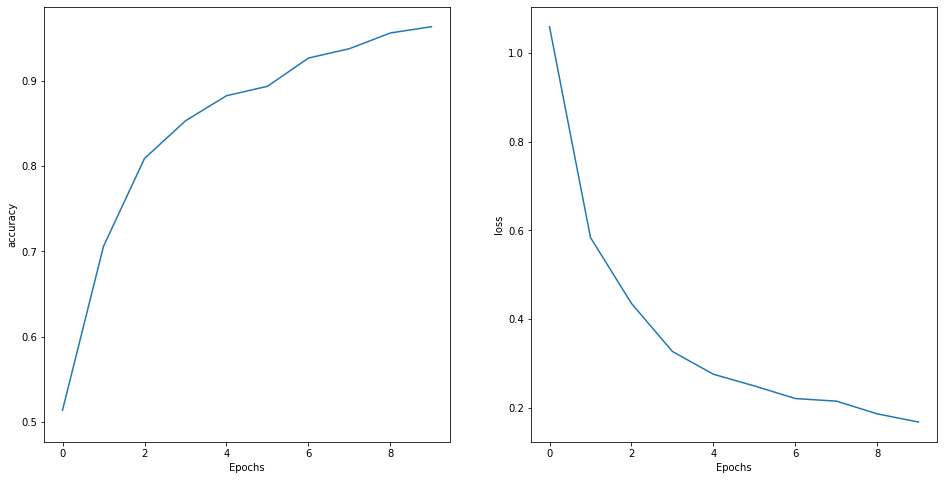

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_'+'accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_'+'loss'], '')
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.show()

In [11]:
# model.save("model.sav")

In [12]:
import os

In [13]:
val_path = "Data/Validation"

In [14]:
valid_generator= train_datagen.flow_from_directory(
    val_path,
    target_size=(224,224), 
    batch_size=32,
    class_mode='binary',
    color_mode="rgb",
    shuffle=True,
)

Found 28 images belonging to 2 classes.


In [26]:
y_actual = []
y_test = []

In [27]:
for i in os.listdir("./Data/Train/Normal"):
  img = image.load_img("./Data/Train/Normal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
#   p = model.predict_classes(img)
  predict_x=model.predict(img)
  classes_x=np.argmax(predict_x,axis=1)
  y_test.append( predict_x[0,0])
  y_actual.append(1)
  

In [28]:
for i in os.listdir("./Data/Train/Covid"):
  img = image.load_img("./Data/Train/Covid/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
#   p = model.predict_classes(img)
  predict_x=model.predict(img)
  classes_x=np.argmax(predict_x,axis=1)
  y_test.append( predict_x[0,0])
  y_actual.append(0)

In [29]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cm = confusion_matrix(y_actual,np.round(y_test))
print(cm)

[[154  14]
 [  1 167]]


In [32]:
import seaborn as sns

In [33]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[154  14]
 [  1 167]]


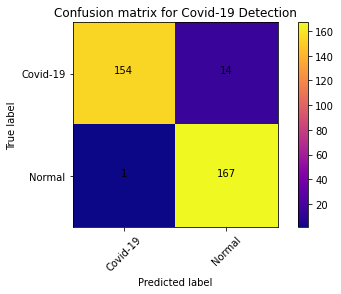

In [34]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")


In [36]:
import visualkeras

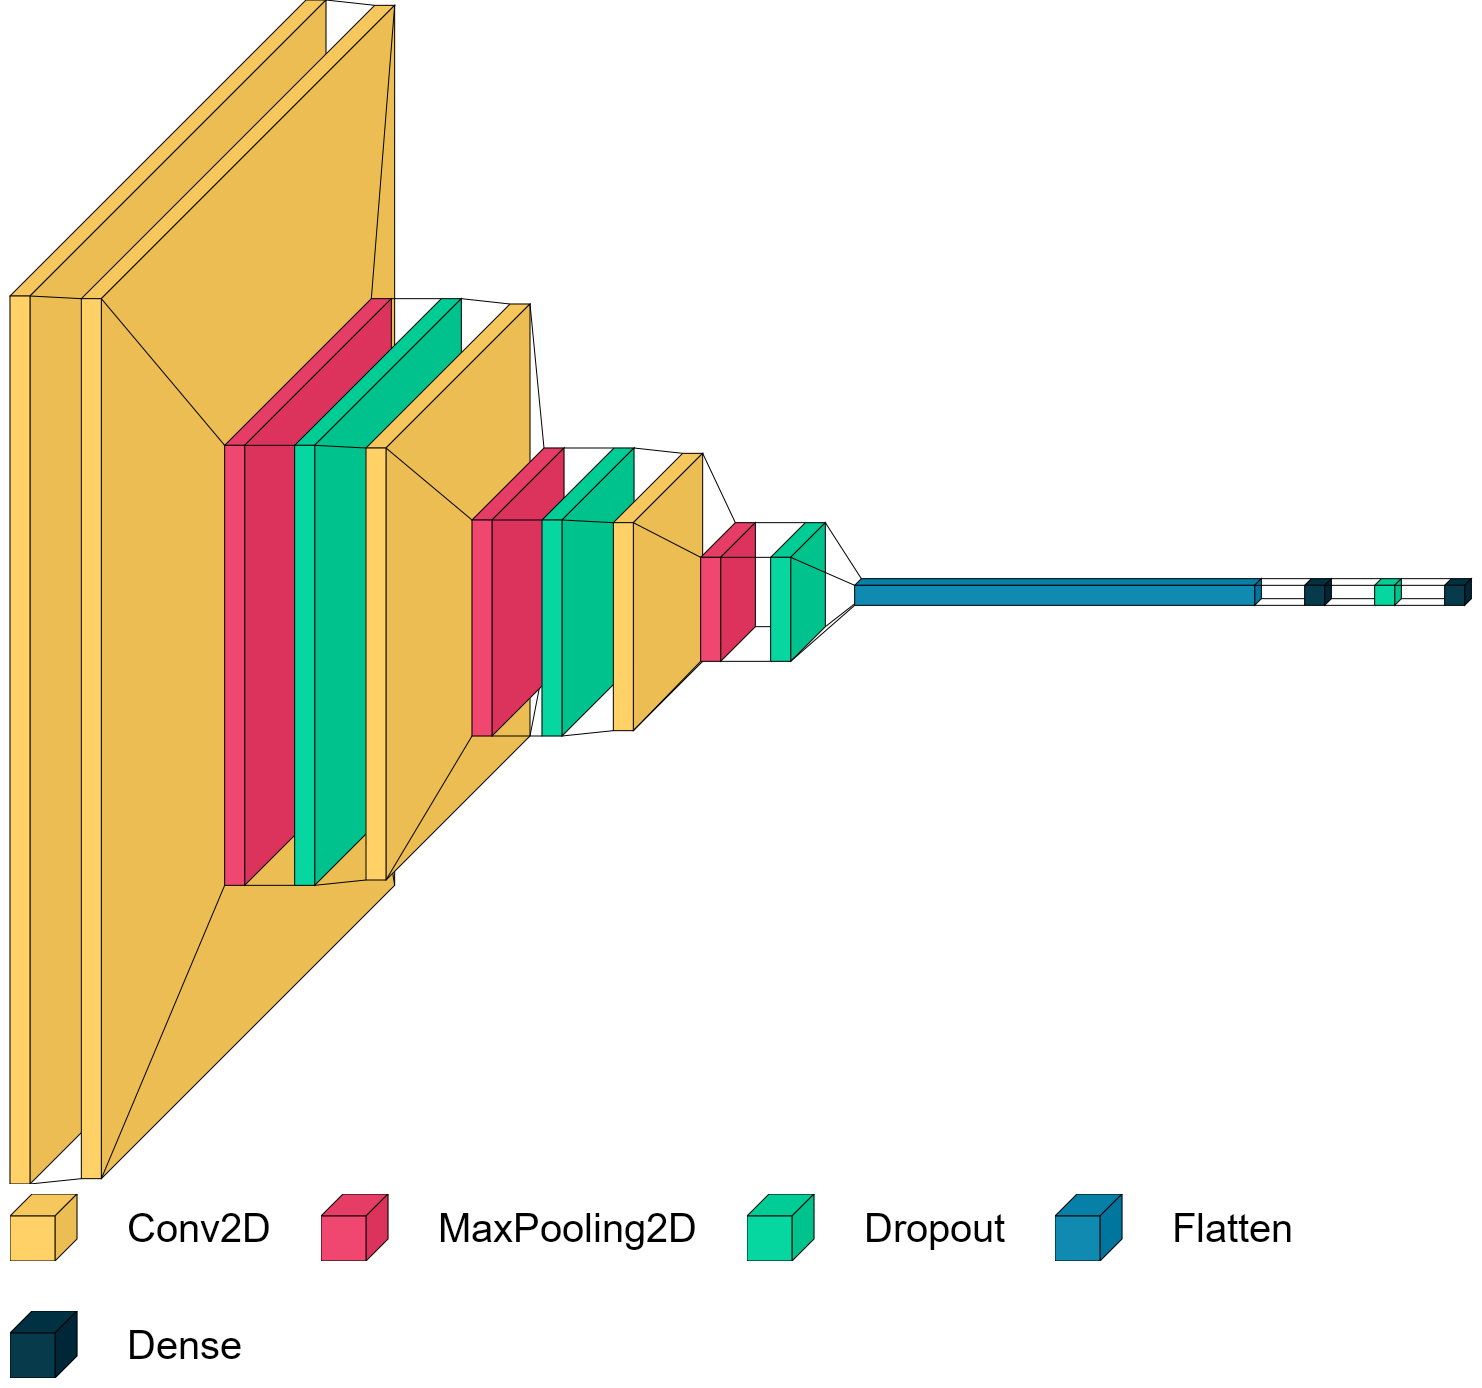

In [45]:
font = ImageFont.truetype("arial.ttf", 40)
visualkeras.layered_view(model, legend=True,font=font ,spacing=50) 

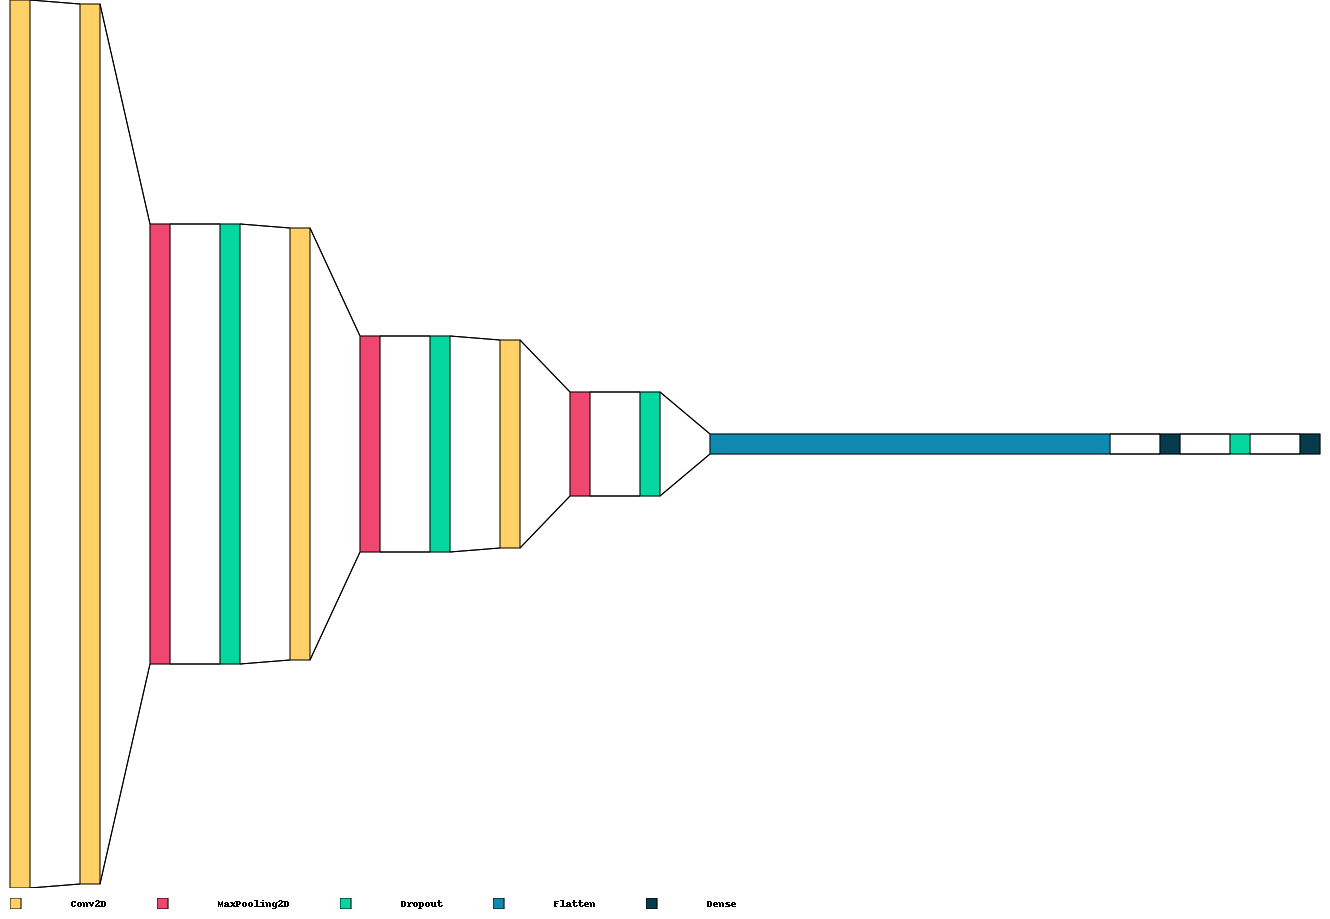

In [42]:
from PIL import ImageFont
visualkeras.layered_view(model, legend=True,draw_volume=False, spacing=50) 